In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy.spatial.distance import hamming

In [2]:
img1 = cv2.imread('the-lion-king.jpg', cv2.COLOR_RGB2GRAY)
img2 = cv2.imread('the-lion-king-part.jpg', cv2.COLOR_BGR2GRAY)

In [3]:
def plot_img(img):
  plt.figure(figsize=(10,10))
  plt.imshow(img)
  plt.axis('off')
  plt.show()

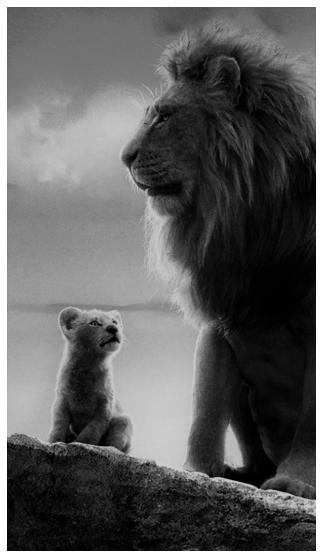

In [4]:
plot_img(img1)

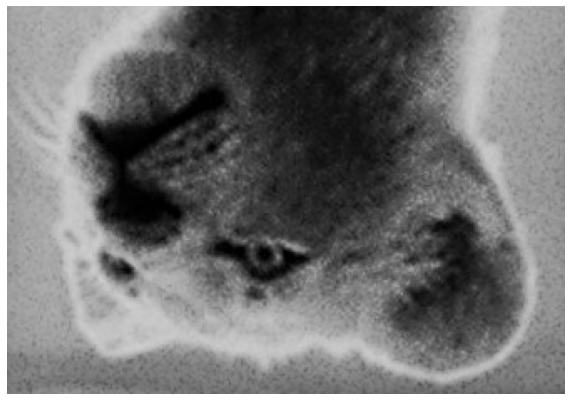

In [5]:
plot_img(img2)

In [7]:
def detectAndCompute(img1, img2):
  # Initiate ORB detector
  detector = cv2.ORB_create()
  
  # find the keypoints and descriptors with ORB
  kp1, des1 = detector.detectAndCompute(img1,None)
  kp2, des2 = detector.detectAndCompute(img2,None)
  return kp1, des1, kp2, des2

In [8]:
kp1, des1, kp2, des2 = detectAndCompute(img1, img2)

In [9]:
def bf_matcher(kp1, des1, kp2, des2, img1, img2, num_matches):
  # create BFMatcher object
  bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
  # Match descriptors.
  matches = bf.match(des1,des2)
  # Sort them in the order of their distance.
  matches = sorted(matches, key = lambda x:x.distance)
  # Draw first num_matches matches.
  img3 = cv2.drawMatches(img1, kp1, img2, kp2, matches[:num_matches], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
  plot_img(img3)

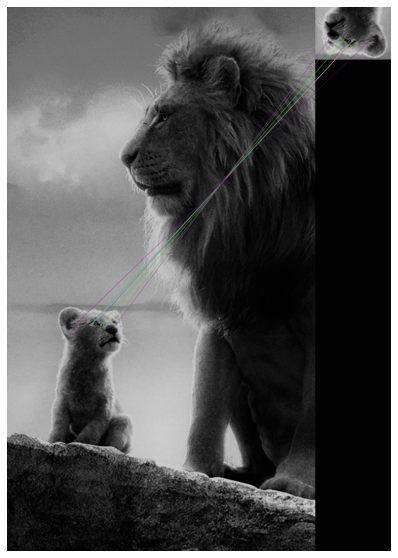

In [10]:
bf_matcher(kp1, des1, kp2, des2, img1, img2, 15)

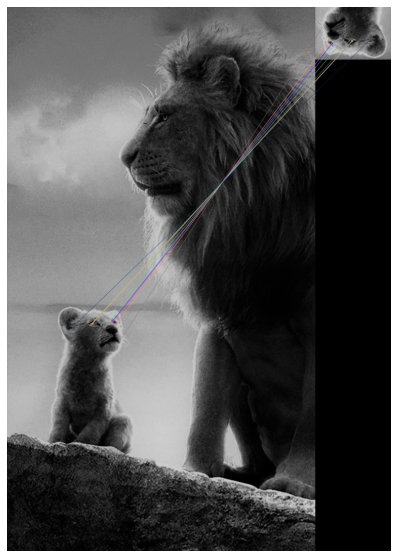

In [11]:
bf_matcher(kp1, des1, kp2, des2, img1, img2, 20)

In [12]:
def distance(k1, k2):
  return hamming(k1, k2)

In [13]:
def custom_BFM(kp1, des1, kp2, des2, img1, img2, num_matches):
    matches = []

    for i, val1 in enumerate(des1):
        for j, val2 in enumerate(des2):
          # Build DMatch object
          matches.append(cv2.DMatch(_distance=distance(val1, val2), _imgIdx=0, _queryIdx=i, _trainIdx=j))

    # Sort them in the order of their distance.
    matches = sorted(matches, key=lambda x:x.distance)

    # Draw first num_matches matches.
    img3 = cv2.drawMatches(img1, kp1, img2, kp2, matches[:num_matches], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    plot_img(img3)

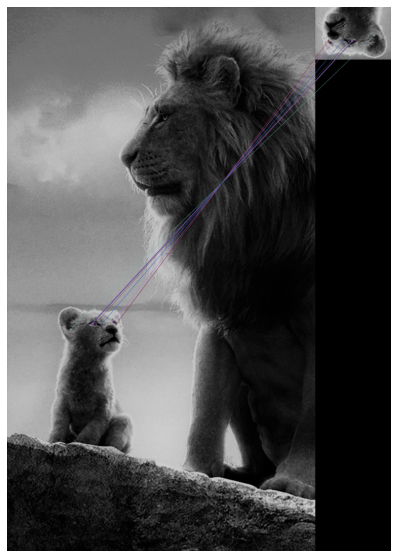

In [14]:
custom_BFM(kp1, des1, kp2, des2, img1, img2, 15)

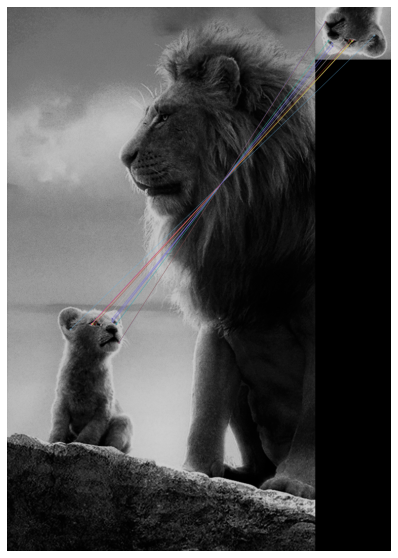

In [15]:
custom_BFM(kp1, des1, kp2, des2, img1, img2, 20)

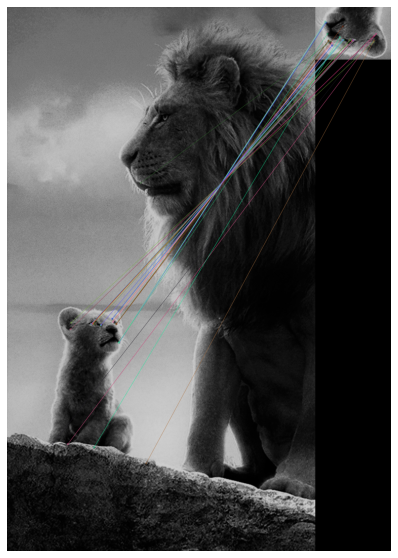

In [16]:
custom_BFM(kp1, des1, kp2, des2, img1, img2, 60)

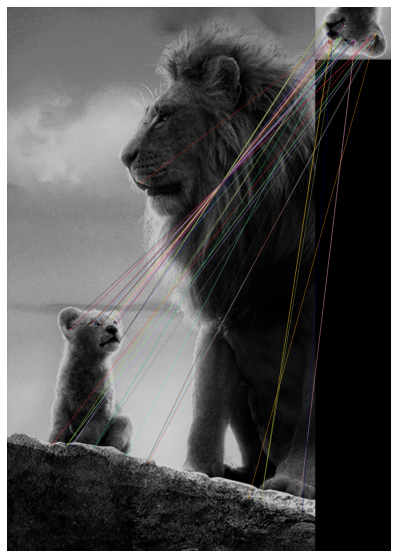

In [17]:
custom_BFM(kp1, des1, kp2, des2, img1, img2, 80)

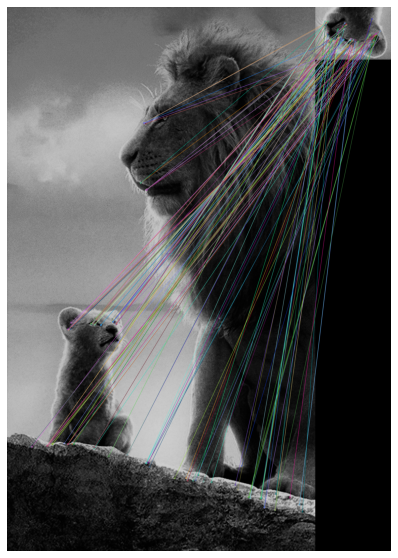

In [18]:
custom_BFM(kp1, des1, kp2, des2, img1, img2, 200)